# N-beam study

In [1211]:
from utils import*;imp.reload(dsp)
import io,os,copy,pandas as pd,numpy as np
from subprocess import check_output
import misc_utils as mut;imp.reload(mut)
from IPython.display import display, Markdown, Latex
import EDutils
from EDutils import utilities as ut 
from blochwave import bloch          ;imp.reload(bloch)
from blochwave import bloch_pp as bl ;imp.reload(bl)
from scipy import integrate
%matplotlib inline

print(check_output(
    'cd {ed_path}; git log | head -n1'.format(
        ed_path=os.path.dirname(os.path.realpath(EDutils.__file__+'/..'))),
    shell=True).decode())

cif_file='resources/LTA.cif'
figs = (18,5)
rpath = 'dat/LTA/rocks'
rock_path=lambda name:'%s/%s' %(rpath,name)
rock_file=lambda name:rock_path(name)+'/rock_.pkl'
rep = lambda s:s.replace(', ','_').replace('(','').replace(')','')
# dsp.matplotlib.use('agg')

using dpi=96
using screenszie=[20.0,11.25] inches
using dpi=96
using screenszie=[20.0,11.25] inches
using dpi=96
using screenszie=[20.0,11.25] inches
using dpi=96
using screenszie=[20.0,11.25] inches
using dpi=96
using screenszie=[20.0,11.25] inches
commit ea8375487a9aade8b78fbfaa45c3f84e0ea60336



## Setup
We choose a random orientation $\mathbf u$ around which we want to simulate a rocking curve.

In [1234]:
u  = np.array([0.66865363, 0.29164837, 0.6521759 ])
u  = u/np.linalg.norm(u)

Sargs=dict(cif_file=cif_file,Smax=0.01,keV=200,Nmax=15,solve=False,v=0)
b=bloch.Bloch(path='dat/LTA',u=u,**Sargs)
b.show_df_G(n=10,cols=['Sw','Vg','Uga','Ug/2KSg','xi_g','Fg2'])
print('%d beams ' %len(b.df_G))

                    Sw       Vg      Uga   Ug/2KSg   xi_g      Fg2
(0, 0, 0)     -2.9e-15 0.00e+00  0.0e+00  0.000000    inf      0.0
(-8, 0, 8)    -1.4e-05 2.21e-03  9.8e-04  0.889411  40758     13.9
(-4, 15, -3)  -1.2e-04 2.07e-03  9.1e-04  0.098123  43579     12.1
(-14, 4, 12)   1.2e-04 2.20e-03  9.8e-04  0.103911  40887     13.8
(-11, 15, 4)  -1.3e-04 2.38e-03  1.1e-03  0.102273  37899     16.0
(4, 4, -6)     1.5e-04 8.88e-04  3.9e-04  0.033172 101352      2.2
(13, -11, -9)  2.3e-04 2.23e-03  9.9e-04  0.053979  40320     14.2
(-9, 13, 3)    2.5e-04 1.94e-03  8.6e-04  0.043764  46387     10.7
(-5, 13, -1)   2.5e-04 1.07e-03  4.7e-04  0.023379  84467      3.2
(2, -7, 1)    -3.1e-04 2.41e-03  1.1e-03  0.042914  37430     16.4
302 beams 


In [1236]:
uvw=ut.get_uvw(u,osc=4,npts=601)
Sargs=dict(cif_file=cif_file,Smax=0.01,keV=200,Nmax=15,solve=False,v=1)
name='Nbeam_Nmax15_Smax001_osc4_npts601'
rock = bl.Bloch_cont(path=rock_path(name),uvw=uvw,tag='',Sargs=Sargs,
                     frames=np.arange(len(uvw)) )

...Nmax... 
...Excitation errors... 
...Vg... 
object saved
dat/LTA/rocks/Nbeam_Nmax15_Smax001_osc3_npts201/u-frame-u-frame__000.pkl


ValueError: cannot reindex on an axis with duplicate labels

### Excitation errors

708 beam within sw_min=5.00e-05
too many beams 708/50 : keeping only top 50


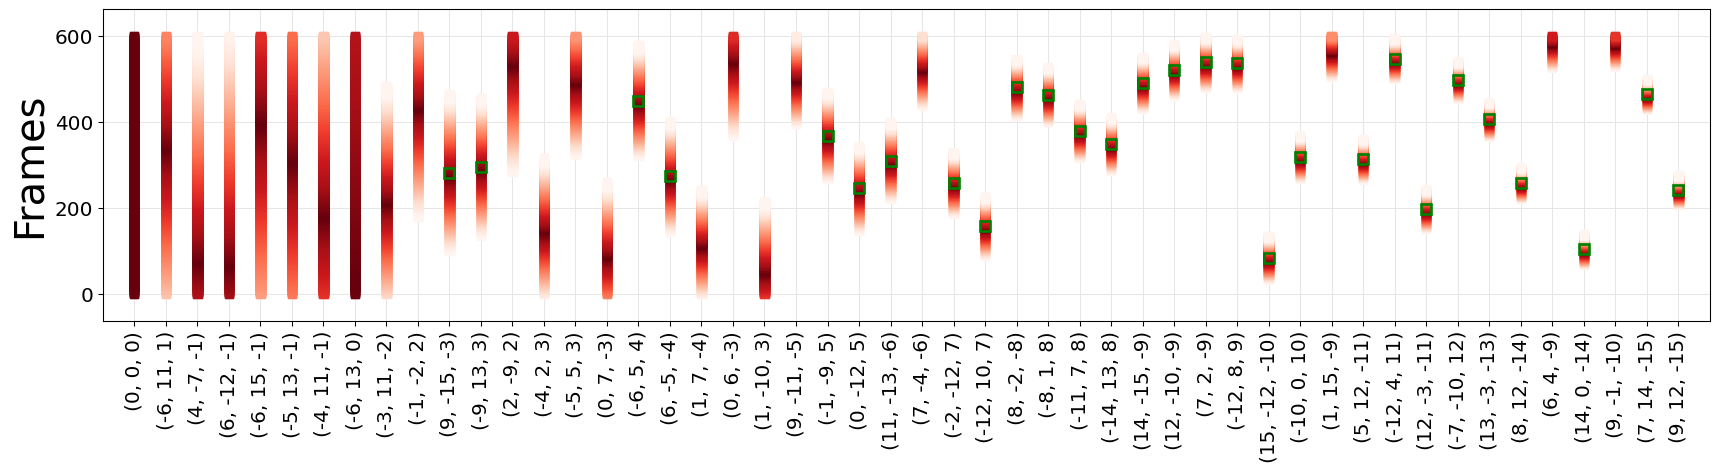

In [1265]:
rock=ut.load_pkl(rock_file('Nbeam_Nmax15_Smax001_osc4_npts601'))
fig,ax=rock.show_excitation_map(vm=0.0095,sw_min=5e-5,nb_max=50,figs=figs);

### Solve

In [1242]:
rock.do('solve',Smax=0.01,thicks=np.arange(10,5001,10))

rock 0
 ...assembling 303x303 matrix (structure factor shape : (61, 61, 61)) ...             
...diagonalization...
object saved
dat/LTA/rocks/Nbeam_Nmax15_Smax001_osc4_npts601/u-frame__000.pkl
object saved
dat/LTA/rocks/Nbeam_Nmax15_Smax001_osc4_npts601/u-frame__000.pkl
rock 1
 ...assembling 306x306 matrix (structure factor shape : (61, 61, 61)) ...             
...diagonalization...
object saved
dat/LTA/rocks/Nbeam_Nmax15_Smax001_osc4_npts601/u-frame__001.pkl
object saved
dat/LTA/rocks/Nbeam_Nmax15_Smax001_osc4_npts601/u-frame__001.pkl
rock 2
 ...assembling 309x309 matrix (structure factor shape : (61, 61, 61)) ...             
...diagonalization...
object saved
dat/LTA/rocks/Nbeam_Nmax15_Smax001_osc4_npts601/u-frame__002.pkl
object saved
dat/LTA/rocks/Nbeam_Nmax15_Smax001_osc4_npts601/u-frame__002.pkl
rock 3
 ...assembling 308x308 matrix (structure factor shape : (61, 61, 61)) ...             
...diagonalization...
object saved
dat/LTA/rocks/Nbeam_Nmax15_Smax001_osc4_npts601/u-frame

In [1244]:
rock=ut.load_pkl(rock_file('Nbeam_Nmax15_Smax001_osc4_npts601'))
rock.do('_set_beams_vs_thickness', verbose=False,thicks=np.arange(10,5001,10),v=0)

### Rocking curves

total number of beams:1


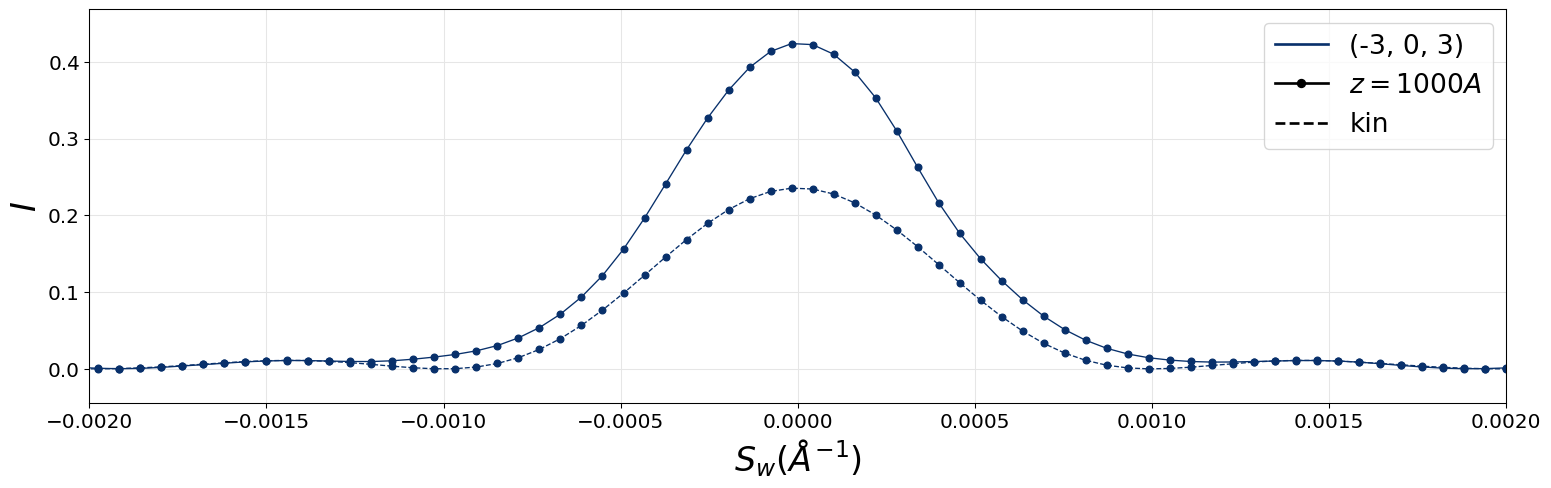

In [1325]:
rock=ut.load_pkl(rock_file('Nbeam_Nmax15_Smax001_osc4_npts601'))
h=str((-3,0,3))
rock.plot_rocking(refl=[h],zs=[1000],cmap='Blues',kin=True,figsize=figs,xylims=['x',-0.002,0.002]);#,name='figs/rock_%s_%s.png' %(name,rep(h)),opt='sc')

In [1266]:
name='Nbeam_Nmax15_Smax001_osc4_npts601'
zs=[100,200,500]
hklf=rock.get_full_refl(Swm=0.0095)
# len(hklf)
for h in hklf:
    fig,ax=rock.plot_rocking(refl=[h],zs=zs,figsize=figs,name='figs/rock_%s_%s.png' %(name,rep(h)),opt='sc');

total number of beams:1
Saving figure :
figs/rock_Nbeam_Nmax15_Smax001_osc4_npts601_-1_-10_5.png
total number of beams:1
Saving figure :
figs/rock_Nbeam_Nmax15_Smax001_osc4_npts601_-1_-11_6.png
total number of beams:1
Saving figure :
figs/rock_Nbeam_Nmax15_Smax001_osc4_npts601_-1_-12_6.png
total number of beams:1
Saving figure :
figs/rock_Nbeam_Nmax15_Smax001_osc4_npts601_-1_-13_7.png
total number of beams:1
Saving figure :
figs/rock_Nbeam_Nmax15_Smax001_osc4_npts601_-1_-14_7.png
total number of beams:1
Saving figure :
figs/rock_Nbeam_Nmax15_Smax001_osc4_npts601_-1_-15_7.png
total number of beams:1
Saving figure :
figs/rock_Nbeam_Nmax15_Smax001_osc4_npts601_-1_-7_4.png
total number of beams:1
Saving figure :
figs/rock_Nbeam_Nmax15_Smax001_osc4_npts601_-1_-9_5.png
total number of beams:1
Saving figure :
figs/rock_Nbeam_Nmax15_Smax001_osc4_npts601_-1_11_-4.png
total number of beams:1
Saving figure :
figs/rock_Nbeam_Nmax15_Smax001_osc4_npts601_-1_13_-5.png
total number of beams:1
Saving f

In [1270]:
# name='Nbeam_Nmax15_Smax001_osc4_npts601'
# h0=str((-1,0,1))
# txt='![](figs/rock_%s_%s.png)' %(name,rep(h0))
# txt
# display(Markdown(txt))

'![](figs/rock_Nbeam_Nmax15_Smax001_osc4_npts601_-1_0_1.png)'

In [ ]:
# z, Iz = rock.get_rocking(zs=[500],refl=hklf)
Iz[list(Iz.keys())[0]][:,0].max()
Imax = {h:I[:,0].max() for h,I in Iz.items()}
Imax.values()
rock.beams['Imax']=0
rock.beams.loc[list(Imax.keys()),'Imax']=list(Imax.values())
# print(rock.beams.sort_values('Imax',ascending=False)[['Imax']].to_string())

In [1302]:
name='Nbeam_Nmax15_Smax001_osc4_npts601'
hklf=rock.beams.loc[rock.beams.Imax>1e-2].sort_values('Imax',ascending=False).index
zs=[100,200,500]
# len(hklf)
for h in hklf:
    fig,ax=rock.plot_rocking(refl=[h],zs=zs,kin=True,figsize=figs,name='figs/rock_%s_%s.png' %(name,rep(h)),opt='sc');

total number of beams:1
Saving figure :
figs/rock_Nbeam_Nmax15_Smax001_osc4_npts601_-2_0_2.png
total number of beams:1
Saving figure :
figs/rock_Nbeam_Nmax15_Smax001_osc4_npts601_-3_0_3.png
total number of beams:1
Saving figure :
figs/rock_Nbeam_Nmax15_Smax001_osc4_npts601_-5_0_5.png
total number of beams:1
Saving figure :
figs/rock_Nbeam_Nmax15_Smax001_osc4_npts601_0_-9_4.png
total number of beams:1
Saving figure :
figs/rock_Nbeam_Nmax15_Smax001_osc4_npts601_-6_0_6.png
total number of beams:1
Saving figure :
figs/rock_Nbeam_Nmax15_Smax001_osc4_npts601_-2_-2_3.png
total number of beams:1
Saving figure :
figs/rock_Nbeam_Nmax15_Smax001_osc4_npts601_1_6_-4.png
total number of beams:1
Saving figure :
figs/rock_Nbeam_Nmax15_Smax001_osc4_npts601_-7_4_5.png
total number of beams:1
Saving figure :
figs/rock_Nbeam_Nmax15_Smax001_osc4_npts601_4_5_-7.png
total number of beams:1
Saving figure :
figs/rock_Nbeam_Nmax15_Smax001_osc4_npts601_-5_-4_7.png
total number of beams:1
Saving figure :
figs/roc

In [1303]:
name='Nbeam_Nmax15_Smax001_osc4_npts601'
# hklf = rock.beams.sort_values('Imax',ascending=False)[:20]
n=5 #number of images per rows
nrows=len(hklf)//n
hs_=np.reshape(hklf[:n*nrows],(nrows,n))
txt=''
for hs in hs_:
    txt +='\n%s\n%s --\n%s\n'%(
        ' | ' .join(hs),
        ' -- | '*(len(hs)-1),
        ' | '.join([ '![](figs/rock_%s_%s.png)' %(name,rep(h)) for h in hs] ),
    )
display(Markdown(txt))



(-2, 0, 2) | (-3, 0, 3) | (-5, 0, 5) | (0, -9, 4) | (-6, 0, 6)
 -- |  -- |  -- |  -- |  --
![](figs/rock_Nbeam_Nmax15_Smax001_osc4_npts601_-2_0_2.png) | ![](figs/rock_Nbeam_Nmax15_Smax001_osc4_npts601_-3_0_3.png) | ![](figs/rock_Nbeam_Nmax15_Smax001_osc4_npts601_-5_0_5.png) | ![](figs/rock_Nbeam_Nmax15_Smax001_osc4_npts601_0_-9_4.png) | ![](figs/rock_Nbeam_Nmax15_Smax001_osc4_npts601_-6_0_6.png)

(-2, -2, 3) | (1, 6, -4) | (-7, 4, 5) | (4, 5, -7) | (-5, -4, 7)
 -- |  -- |  -- |  -- |  --
![](figs/rock_Nbeam_Nmax15_Smax001_osc4_npts601_-2_-2_3.png) | ![](figs/rock_Nbeam_Nmax15_Smax001_osc4_npts601_1_6_-4.png) | ![](figs/rock_Nbeam_Nmax15_Smax001_osc4_npts601_-7_4_5.png) | ![](figs/rock_Nbeam_Nmax15_Smax001_osc4_npts601_4_5_-7.png) | ![](figs/rock_Nbeam_Nmax15_Smax001_osc4_npts601_-5_-4_7.png)

(5, 5, -8) | (-5, -9, 9) | (-4, 0, 4) | (-9, 9, 5) | (-5, -5, 7)
 -- |  -- |  -- |  -- |  --
![](figs/rock_Nbeam_Nmax15_Smax001_osc4_npts601_5_5_-8.png) | ![](figs/rock_Nbeam_Nmax15_Smax001_osc4_npts601_-5_-9_9.png) | ![](figs/rock_Nbeam_Nmax15_Smax001_osc4_npts601_-4_0_4.png) | ![](figs/rock_Nbeam_Nmax15_Smax001_osc4_npts601_-9_9_5.png) | ![](figs/rock_Nbeam_Nmax15_Smax001_osc4_npts601_-5_-5_7.png)


### I_kin vs I_dyn

In [1307]:
name='Nbeam_Nmax15_Smax001_osc4_npts601'
rock=ut.load_pkl(rock_file(name))
hklf=rock.get_full_refl(Swm=0.0095)
rock._integrate_rocking(refl=hklf)
iZs,nzs=rock._get_iZs(iZs=None,zs=[t])
iZ=iZs[0]#;print(t,iZ)
df = ut.load_pkl(b.get_Fhkl_pkl()).loc[hklf,['F']].copy()
df['Ug']   = np.real(np.abs(df.F*cst.meff(b.keV)/(np.pi*b.crys.volume)))
df['xi_g'] = np.real(b.k0/df.Ug)

Ikin = lambda sw,t,xi_g:((np.pi*t/xi_g)*np.sinc(np.array(sw)*t))**2
df['Idyns'] = np.array([rock.Iz_dyn[h][iZ] for h in hklf])
df['Ikins'] = np.array([rock.Iz_kin[h][iZ] for h in hklf])
# df['Ikins'] = np.abs([integrate.trapz(Ikin(sw,t,xi_g),sw) for xi_g,sw in zip(df.xi_g,rock.beams.loc[hklf,'Sw']) ])
df['rel']=np.abs(df.Idyns-df.Ikins)/df.Ikins

formats={'xi_g':'{:>7.0f}','Idyns':'{:>6.2e}','Ikins':'{:>6.2e}'}
print(df.sort_values('Ikins',ascending=False)[['xi_g','Idyns','Ikins','rel']][:10].to_string(formatters={k: v.format for k, v in formats.items()}))
Rfactor=np.abs(df.Idyns-df.Ikins).sum()/df.Ikins.sum()*100
print('Rfactor=%.1f' %Rfactor)
# print(len(df.loc[df.rel<0.1].sort_values('rel')),len(hklf))


object saved
dat/LTA/rocks/Nbeam_Nmax15_Smax001_osc4_npts601/rock_.pkl
rock.Iz updated
              xi_g    Idyns    Ikins       rel
(-2, 0, 2)    4110 2.18e-04 2.86e-04  0.237938
(5, 0, -5)    5642 8.63e-05 1.52e-04  0.431503
(-5, 0, 5)    5642 8.47e-05 1.52e-04  0.442167
(3, 0, -3)    6471 1.98e-04 1.15e-04  0.718583
(-3, 0, 3)    6471 1.89e-04 1.15e-04  0.635020
(-4, 0, 4)    6753 3.83e-05 1.06e-04  0.638529
(4, 0, -4)    6753 3.85e-05 1.06e-04  0.637328
(0, -9, 4)    8529 5.43e-05 6.65e-05  0.183006
(0, 9, -4)    8529 4.19e-05 6.65e-05  0.369183
(2, 2, -3)    9870 4.20e-05 4.96e-05  0.154692
Rfactor=36.2


In [961]:
### locate a reflection from coordinates  
x,y = 1.8e-5,6e-5
i=np.sqrt(0*(df.Ikins-x)**2 + (df.Idyns-y)**2 ).argmin()
df.iloc[i].name

'(-5, -5, 7)'

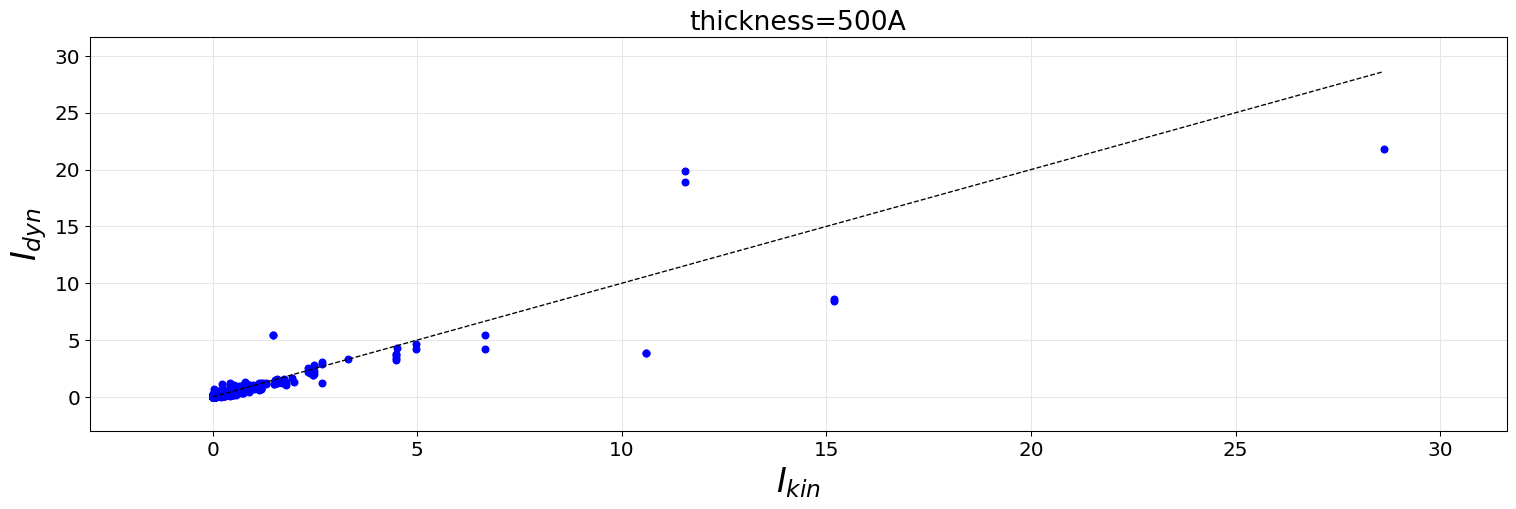

In [1308]:
Imax=df.Ikins.max()*1e5

plts  = [[df.Ikins*1e5,df.Idyns*1e5,'bo','']]
plts  += [[[0,Imax],[0,s*Imax],'k--',''] for s in [1] ]#[0.5,1,2]]
fig,ax = dsp.stddisp(plts,title="thickness=%dA" %t,labs=['$I_{kin}$','$I_{dyn}$'],
                     figsize=figs)#,xylims=[0,2e-4,0,1e-4])

### Thickness dependent R factor

In [1313]:
name='Nbeam_Nmax15_Smax001_osc4_npts601'
rock=ut.load_pkl(rock_file(name))
hklf=rock.get_full_refl(Swm=0.0095)

thicks=rock.load(0).z
Rfactors=np.zeros(thicks.shape)
# Ikin = lambda sw,t,xi_g:((np.pi*t/xi_g)*np.sinc(np.array(sw)*t))**2

for i,t in enumerate(thicks):    
    iZs,nzs=rock._get_iZs(iZs=None,zs=[t])
    Idyns = np.array([rock.Iz_dyn[h][iZs[0]] for h in hklf])
    Ikins = np.array([rock.Iz_kin[h][iZs[0]] for h in hklf])
    # Ikins = np.abs([integrate.trapz(Ikin(sw,t,xi_g),sw) for xi_g,sw in zip(df.xi_g,rock.beams.loc[hklf,'Sw']) ])
    Rfactors[i]=np.abs(Idyns-Ikins).sum()/Ikins.sum()*100    
    # print('t=%d, Rfactor=%.1f' %(t,Rfactors[i]))

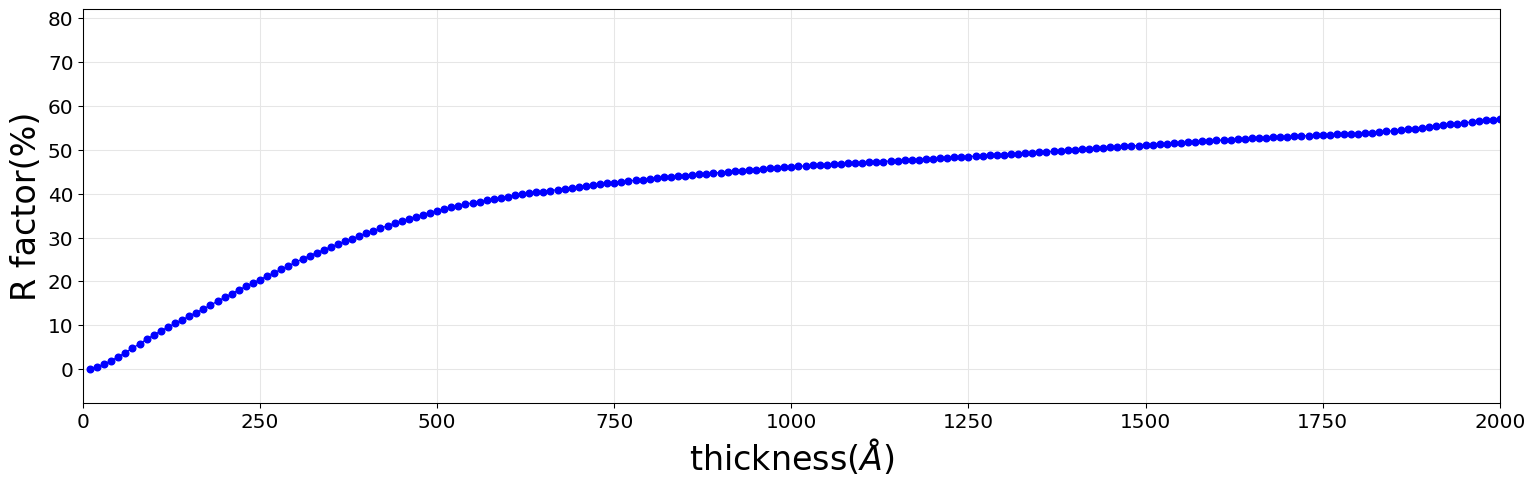

In [1314]:
plts=[[thicks,Rfactors,'b-o','']]
fig,ax = dsp.stddisp(plts,labs=['thickness($\AA$)','R factor(%)'],
                     figsize=figs,xylims=['x',0,2000])#,0,50])

## Running major beams 
In this simulations we will try to iteratively remove the beams that do not seem to contribute significantly to the overall intensities.

### Simulations 

In [1212]:
u  = np.array([0.66865363, 0.29164837, 0.6521759 ])
u  = u/np.linalg.norm(u)
uvw=ut.get_uvw(u,osc=2,npts=101)
Sargs=dict(cif_file=cif_file,Smax=0.005,keV=200,Nmax=15,solve=False,v=0)

rock = bl.Bloch_cont(path=rock_path('Nstrong_beam_Nmax15'),uvw=uvw,tag='',Sargs=Sargs,
                     params=[],vals=[],
                     frames=np.arange(len(uvw)),verbose=False )

In [1213]:
rock.do('solve_strong_beam',verbose=True,thick=500,solve_args=dict(opts=''),
    Imin=5e-4,dImin=0.05)

rock 0
object saved
dat/LTA/rocks/Nstrong_beam/u-frame__000.pkl
object saved
dat/LTA/rocks/Nstrong_beam/u-frame__000.pkl
rock 1
object saved
dat/LTA/rocks/Nstrong_beam/u-frame__001.pkl
object saved
dat/LTA/rocks/Nstrong_beam/u-frame__001.pkl
rock 2
object saved
dat/LTA/rocks/Nstrong_beam/u-frame__002.pkl
object saved
dat/LTA/rocks/Nstrong_beam/u-frame__002.pkl
rock 3
object saved
dat/LTA/rocks/Nstrong_beam/u-frame__003.pkl
object saved
dat/LTA/rocks/Nstrong_beam/u-frame__003.pkl
rock 4
object saved
dat/LTA/rocks/Nstrong_beam/u-frame__004.pkl
object saved
dat/LTA/rocks/Nstrong_beam/u-frame__004.pkl
rock 5
object saved
dat/LTA/rocks/Nstrong_beam/u-frame__005.pkl
object saved
dat/LTA/rocks/Nstrong_beam/u-frame__005.pkl
rock 6
object saved
dat/LTA/rocks/Nstrong_beam/u-frame__006.pkl
object saved
dat/LTA/rocks/Nstrong_beam/u-frame__006.pkl
rock 7
object saved
dat/LTA/rocks/Nstrong_beam/u-frame__007.pkl
object saved
dat/LTA/rocks/Nstrong_beam/u-frame__007.pkl
rock 8
object saved
dat/LTA/rock

In [1214]:
df = rock.df.copy()
df['strong']=0
df['weak']=0
df['lost']=0
# rock.df.iloc[i]['weak'  ] = [len(rock.load(i).df_hkl_weak) for i in range(rock.n_simus)]
for i,n in enumerate(df.index):
    b = rock.load(i)
    df.loc[n,'strong'] = len(b.df_hkl_strong)
    df.loc[n,'weak'  ] = len(b.df_hkl_weak.loc[b.df_hkl_weak['in']==True])
    df.loc[n,'lost'  ] = len(b.df_hkl_weak.loc[b.df_hkl_weak['in']==False])

df['tot'] = df.strong+df.weak+df.lost
print(df[['strong','weak','lost','nbeams']].to_string() )

              strong  weak  lost  nbeams
u-frame__000      19    22    44      85
u-frame__001      22    18    44      84
u-frame__002      23    17    48      88
u-frame__003      23    20    45      88
u-frame__004      24    22    42      88
u-frame__005      22    17    47      86
u-frame__006      26    22    40      88
u-frame__007      23    16    48      87
u-frame__008      21    23    41      85
u-frame__009      21    16    44      81
u-frame__010      22    22    35      79
u-frame__011      20    22    43      85
u-frame__012      20    23    40      83
u-frame__013      21    22    40      83
u-frame__014      23    31    29      83
u-frame__015      14    19    48      81
u-frame__016      18    22    41      81
u-frame__017      19    26    37      82
u-frame__018      22    30    29      81
u-frame__019      25    30    26      81
u-frame__020      27    24    30      81
u-frame__021      28    25    26      79
u-frame__022      29    22    28      79
u-frame__023    

### Rocking curves

In [1197]:
hkl_strong = np.unique(np.hstack([rock.load(i).df_hkl_strong.index for i in range(rock.n_simus)]))
df_strong = pd.DataFrame(index=hkl_strong, columns=['Imax','frame'])

for h in hkl_strong:
    # print(h)
    sw,frames = rock.beams.loc[h,['Sw','Frame']]
    Inew,Iref = np.zeros(len(frames)),np.zeros(len(frames))
    for i,f in enumerate(frames):
        b=rock.load(f)
        if h in b.df_hkl_strong.index:            
            Inew[i],Iref[i] = b.df_hkl_strong.loc[h,['I','Iref']].values
        else:
            if h in b.df_G.index:  
                Inew[i] = b.df_G.loc[h,'I']
    df_strong.loc[h] = [Inew.max(),frames[Inew.argmax()]]
    plts=[[sw,Inew,'b-o','new' ],
          [sw,Iref,'b--o','ref'],
         ]
    
    # dsp.stddisp(plts,labs=['Sw($A^{-1})$','I'],figsize=figs,name='figs/rock_strong_%s.png' %rep(h),opt='sc')

In [1191]:
h0=str((-1,0,1))
txt='![](figs/rock_strong_%s.png)' %(rep(h0))
display(Markdown(txt))

![](figs/rock_strong_-1_0_1.png)

In [1202]:
n=5 #number of images per rows
hklf = df_strong.sort_values('Imax',ascending=False).index
nrows=len(hklf)//n
hs_=np.reshape(hklf[:n*nrows],(nrows,n))
name='Nbeam'
txt=''
for hs in hs_:
    txt +='\n%s\n%s --\n%s\n'%(
        ' | ' .join(hs),
        ' -- | '*(len(hs)-1),
        ' | '.join([ '![](figs/rock_strong_%s.png)' %rep(h) for h in hs] ),
    )
# print(txt)
display(Markdown(txt))



(0, 0, 0) | (-2, 0, 2) | (2, 0, -2) | (3, 0, -3) | (-3, 0, 3)
 -- |  -- |  -- |  -- |  --
![](figs/rock_strong_0_0_0.png) | ![](figs/rock_strong_-2_0_2.png) | ![](figs/rock_strong_2_0_-2.png) | ![](figs/rock_strong_3_0_-3.png) | ![](figs/rock_strong_-3_0_3.png)

(-1, 0, 1) | (1, 0, -1) | (-1, -2, 2) | (1, 2, -2) | (5, 0, -5)
 -- |  -- |  -- |  -- |  --
![](figs/rock_strong_-1_0_1.png) | ![](figs/rock_strong_1_0_-1.png) | ![](figs/rock_strong_-1_-2_2.png) | ![](figs/rock_strong_1_2_-2.png) | ![](figs/rock_strong_5_0_-5.png)

(-5, 0, 5) | (0, -9, 4) | (-6, 0, 6) | (6, 0, -6) | (2, 2, -3)
 -- |  -- |  -- |  -- |  --
![](figs/rock_strong_-5_0_5.png) | ![](figs/rock_strong_0_-9_4.png) | ![](figs/rock_strong_-6_0_6.png) | ![](figs/rock_strong_6_0_-6.png) | ![](figs/rock_strong_2_2_-3.png)

(1, 6, -4) | (-2, -2, 3) | (0, 9, -4) | (-7, 4, 5) | (-5, -4, 7)
 -- |  -- |  -- |  -- |  --
![](figs/rock_strong_1_6_-4.png) | ![](figs/rock_strong_-2_-2_3.png) | ![](figs/rock_strong_0_9_-4.png) | ![](figs/rock_strong_-7_4_5.png) | ![](figs/rock_strong_-5_-4_7.png)

(4, 0, -4) | (-5, -9, 9) | (5, 4, -7) | (7, -5, -5) | (-9, 9, 5)
 -- |  -- |  -- |  -- |  --
![](figs/rock_strong_4_0_-4.png) | ![](figs/rock_strong_-5_-9_9.png) | ![](figs/rock_strong_5_4_-7.png) | ![](figs/rock_strong_7_-5_-5.png) | ![](figs/rock_strong_-9_9_5.png)

(-4, 0, 4) | (-11, 0, 11) | (-5, -5, 7) | (6, -3, -5) | (-7, 5, 5)
 -- |  -- |  -- |  -- |  --
![](figs/rock_strong_-4_0_4.png) | ![](figs/rock_strong_-11_0_11.png) | ![](figs/rock_strong_-5_-5_7.png) | ![](figs/rock_strong_6_-3_-5.png) | ![](figs/rock_strong_-7_5_5.png)

(2, 4, -4) | (6, 3, -8) | (7, -10, -3) | (1, 8, -5) | (-3, -10, 7)
 -- |  -- |  -- |  -- |  --
![](figs/rock_strong_2_4_-4.png) | ![](figs/rock_strong_6_3_-8.png) | ![](figs/rock_strong_7_-10_-3.png) | ![](figs/rock_strong_1_8_-5.png) | ![](figs/rock_strong_-3_-10_7.png)

(0, 11, -5) | (-2, -4, 4) | (5, 11, -11) | (4, 6, -7) | (-2, 9, -2)
 -- |  -- |  -- |  -- |  --
![](figs/rock_strong_0_11_-5.png) | ![](figs/rock_strong_-2_-4_4.png) | ![](figs/rock_strong_5_11_-11.png) | ![](figs/rock_strong_4_6_-7.png) | ![](figs/rock_strong_-2_9_-2.png)

(3, 6, -6) | (6, -1, -6) | (-4, 11, -1) | (5, 9, -9) | (9, -2, -9)
 -- |  -- |  -- |  -- |  --
![](figs/rock_strong_3_6_-6.png) | ![](figs/rock_strong_6_-1_-6.png) | ![](figs/rock_strong_-4_11_-1.png) | ![](figs/rock_strong_5_9_-9.png) | ![](figs/rock_strong_9_-2_-9.png)

(-1, 9, -3) | (1, 9, -5) | (-6, -11, 11) | (-10, 4, 8) | (-7, 7, 4)
 -- |  -- |  -- |  -- |  --
![](figs/rock_strong_-1_9_-3.png) | ![](figs/rock_strong_1_9_-5.png) | ![](figs/rock_strong_-6_-11_11.png) | ![](figs/rock_strong_-10_4_8.png) | ![](figs/rock_strong_-7_7_4.png)

(7, 3, -9) | (10, -1, -10) | (8, 4, -10) | (-9, 4, 7) | (-7, -4, 9)
 -- |  -- |  -- |  -- |  --
![](figs/rock_strong_7_3_-9.png) | ![](figs/rock_strong_10_-1_-10.png) | ![](figs/rock_strong_8_4_-10.png) | ![](figs/rock_strong_-9_4_7.png) | ![](figs/rock_strong_-7_-4_9.png)

(-10, -1, 10) | (4, 11, -9) | (-9, 11, 4) | (7, 0, -7) | (-10, 1, 10)
 -- |  -- |  -- |  -- |  --
![](figs/rock_strong_-10_-1_10.png) | ![](figs/rock_strong_4_11_-9.png) | ![](figs/rock_strong_-9_11_4.png) | ![](figs/rock_strong_7_0_-7.png) | ![](figs/rock_strong_-10_1_10.png)

(7, 4, -9) | (-1, -9, 5) | (-9, -4, 11) | (-4, -6, 7) | (-8, -4, 10)
 -- |  -- |  -- |  -- |  --
![](figs/rock_strong_7_4_-9.png) | ![](figs/rock_strong_-1_-9_5.png) | ![](figs/rock_strong_-9_-4_11.png) | ![](figs/rock_strong_-4_-6_7.png) | ![](figs/rock_strong_-8_-4_10.png)

(-3, -9, 7) | (6, 11, -11) | (4, 9, -8) | (-4, -7, 7) | (-11, 11, 6)
 -- |  -- |  -- |  -- |  --
![](figs/rock_strong_-3_-9_7.png) | ![](figs/rock_strong_6_11_-11.png) | ![](figs/rock_strong_4_9_-8.png) | ![](figs/rock_strong_-4_-7_7.png) | ![](figs/rock_strong_-11_11_6.png)

(7, -8, -4) | (6, 2, -7) | (-5, 9, 1) | (-7, 2, 6) | (-7, 0, 7)
 -- |  -- |  -- |  -- |  --
![](figs/rock_strong_7_-8_-4.png) | ![](figs/rock_strong_6_2_-7.png) | ![](figs/rock_strong_-5_9_1.png) | ![](figs/rock_strong_-7_2_6.png) | ![](figs/rock_strong_-7_0_7.png)

(5, -5, -3) | (10, 0, -11) | (3, 9, -7) | (-6, 9, 2) | (-5, 11, 0)
 -- |  -- |  -- |  -- |  --
![](figs/rock_strong_5_-5_-3.png) | ![](figs/rock_strong_10_0_-11.png) | ![](figs/rock_strong_3_9_-7.png) | ![](figs/rock_strong_-6_9_2.png) | ![](figs/rock_strong_-5_11_0.png)

(9, 4, -11) | (-8, -5, 10) | (9, -10, -5) | (-6, -2, 7) | (-5, -10, 9)
 -- |  -- |  -- |  -- |  --
![](figs/rock_strong_9_4_-11.png) | ![](figs/rock_strong_-8_-5_10.png) | ![](figs/rock_strong_9_-10_-5.png) | ![](figs/rock_strong_-6_-2_7.png) | ![](figs/rock_strong_-5_-10_9.png)

(-5, -6, 8) | (1, -9, 3) | (-3, -5, 5) | (-11, 4, 9) | (0, -7, 3)
 -- |  -- |  -- |  -- |  --
![](figs/rock_strong_-5_-6_8.png) | ![](figs/rock_strong_1_-9_3.png) | ![](figs/rock_strong_-3_-5_5.png) | ![](figs/rock_strong_-11_4_9.png) | ![](figs/rock_strong_0_-7_3.png)

(-1, 11, -4) | (-7, 9, 3) | (-8, 5, 6) | (2, -7, 1) | (7, -7, -4)
 -- |  -- |  -- |  -- |  --
![](figs/rock_strong_-1_11_-4.png) | ![](figs/rock_strong_-7_9_3.png) | ![](figs/rock_strong_-8_5_6.png) | ![](figs/rock_strong_2_-7_1.png) | ![](figs/rock_strong_7_-7_-4.png)

(5, 6, -8) | (-9, 3, 8) | (11, -1, -11) | (-7, -9, 11) | (7, -1, -7)
 -- |  -- |  -- |  -- |  --
![](figs/rock_strong_5_6_-8.png) | ![](figs/rock_strong_-9_3_8.png) | ![](figs/rock_strong_11_-1_-11.png) | ![](figs/rock_strong_-7_-9_11.png) | ![](figs/rock_strong_7_-1_-7.png)

(-4, -10, 8) | (-8, -3, 9) | (9, 1, -10) | (11, -4, -10) | (8, -10, -4)
 -- |  -- |  -- |  -- |  --
![](figs/rock_strong_-4_-10_8.png) | ![](figs/rock_strong_-8_-3_9.png) | ![](figs/rock_strong_9_1_-10.png) | ![](figs/rock_strong_11_-4_-10.png) | ![](figs/rock_strong_8_-10_-4.png)

(-2, -11, 7) | (-8, 11, 3) | (9, -5, -7) | (-3, -11, 8) | (-11, -1, 11)
 -- |  -- |  -- |  -- |  --
![](figs/rock_strong_-2_-11_7.png) | ![](figs/rock_strong_-8_11_3.png) | ![](figs/rock_strong_9_-5_-7.png) | ![](figs/rock_strong_-3_-11_8.png) | ![](figs/rock_strong_-11_-1_11.png)

(-11, 9, 7) | (8, 5, -11) | (9, -3, -8) | (-10, 5, 8) | (-1, -11, 6)
 -- |  -- |  -- |  -- |  --
![](figs/rock_strong_-11_9_7.png) | ![](figs/rock_strong_8_5_-11.png) | ![](figs/rock_strong_9_-3_-8.png) | ![](figs/rock_strong_-10_5_8.png) | ![](figs/rock_strong_-1_-11_6.png)

(-11, 1, 11) | (10, -6, -8) | (6, 8, -10) | (-6, -5, 8) | (11, -8, -8)
 -- |  -- |  -- |  -- |  --
![](figs/rock_strong_-11_1_11.png) | ![](figs/rock_strong_10_-6_-8.png) | ![](figs/rock_strong_6_8_-10.png) | ![](figs/rock_strong_-6_-5_8.png) | ![](figs/rock_strong_11_-8_-8.png)

(-10, 3, 9) | (10, -5, -8) | (-2, -9, 6) | (8, -5, -6) | (5, 2, -6)
 -- |  -- |  -- |  -- |  --
![](figs/rock_strong_-10_3_9.png) | ![](figs/rock_strong_10_-5_-8.png) | ![](figs/rock_strong_-2_-9_6.png) | ![](figs/rock_strong_8_-5_-6.png) | ![](figs/rock_strong_5_2_-6.png)

(-6, -6, 9) | (-4, -4, 6) | (-9, 5, 7) | (3, 4, -5) | (8, 1, -9)
 -- |  -- |  -- |  -- |  --
![](figs/rock_strong_-6_-6_9.png) | ![](figs/rock_strong_-4_-4_6.png) | ![](figs/rock_strong_-9_5_7.png) | ![](figs/rock_strong_3_4_-5.png) | ![](figs/rock_strong_8_1_-9.png)

(1, -7, 2) | (-3, -4, 5) | (-6, 2, 5) | (-5, -2, 6) | (-2, -7, 5)
 -- |  -- |  -- |  -- |  --
![](figs/rock_strong_1_-7_2.png) | ![](figs/rock_strong_-3_-4_5.png) | ![](figs/rock_strong_-6_2_5.png) | ![](figs/rock_strong_-5_-2_6.png) | ![](figs/rock_strong_-2_-7_5.png)

(-4, -11, 9) | (-2, 11, -3) | (0, 2, -1) | (10, -2, -10) | (-8, -8, 11)
 -- |  -- |  -- |  -- |  --
![](figs/rock_strong_-4_-11_9.png) | ![](figs/rock_strong_-2_11_-3.png) | ![](figs/rock_strong_0_2_-1.png) | ![](figs/rock_strong_10_-2_-10.png) | ![](figs/rock_strong_-8_-8_11.png)

(-3, 11, -2) | (-11, 3, 10) | (7, 2, -8) | (11, -3, -10) | (4, 4, -6)
 -- |  -- |  -- |  -- |  --
![](figs/rock_strong_-3_11_-2.png) | ![](figs/rock_strong_-11_3_10.png) | ![](figs/rock_strong_7_2_-8.png) | ![](figs/rock_strong_11_-3_-10.png) | ![](figs/rock_strong_4_4_-6.png)

(-5, 2, 4) | (-9, 6, 6) | (-5, -11, 10) | (-1, -7, 4) | (-7, -5, 9)
 -- |  -- |  -- |  -- |  --
![](figs/rock_strong_-5_2_4.png) | ![](figs/rock_strong_-9_6_6.png) | ![](figs/rock_strong_-5_-11_10.png) | ![](figs/rock_strong_-1_-7_4.png) | ![](figs/rock_strong_-7_-5_9.png)

(2, 10, -7) | (-10, -3, 11) | (6, 6, -9) | (-7, 11, 2) | (-6, -10, 10)
 -- |  -- |  -- |  -- |  --
![](figs/rock_strong_2_10_-7.png) | ![](figs/rock_strong_-10_-3_11.png) | ![](figs/rock_strong_6_6_-9.png) | ![](figs/rock_strong_-7_11_2.png) | ![](figs/rock_strong_-6_-10_10.png)

(9, -8, -6) | (-8, 2, 7) | (10, -10, -6) | (7, -3, -6) | (-7, -2, 8)
 -- |  -- |  -- |  -- |  --
![](figs/rock_strong_9_-8_-6.png) | ![](figs/rock_strong_-8_2_7.png) | ![](figs/rock_strong_10_-10_-6.png) | ![](figs/rock_strong_7_-3_-6.png) | ![](figs/rock_strong_-7_-2_8.png)

(-6, 7, 3) | (9, 3, -11) | (-3, 2, 2) | (-11, 2, 10) | (-10, -2, 11)
 -- |  -- |  -- |  -- |  --
![](figs/rock_strong_-6_7_3.png) | ![](figs/rock_strong_9_3_-11.png) | ![](figs/rock_strong_-3_2_2.png) | ![](figs/rock_strong_-11_2_10.png) | ![](figs/rock_strong_-10_-2_11.png)

(-6, 11, 1) | (5, 9, -10) | (10, 2, -11) | (2, 9, -6) | (5, -7, -2)
 -- |  -- |  -- |  -- |  --
![](figs/rock_strong_-6_11_1.png) | ![](figs/rock_strong_5_9_-10.png) | ![](figs/rock_strong_10_2_-11.png) | ![](figs/rock_strong_2_9_-6.png) | ![](figs/rock_strong_5_-7_-2.png)

(-2, 2, 1) | (7, 5, -10) | (-6, -8, 9) | (-9, -3, 10) | (-4, -2, 5)
 -- |  -- |  -- |  -- |  --
![](figs/rock_strong_-2_2_1.png) | ![](figs/rock_strong_7_5_-10.png) | ![](figs/rock_strong_-6_-8_9.png) | ![](figs/rock_strong_-9_-3_10.png) | ![](figs/rock_strong_-4_-2_5.png)

(10, -3, -9) | (-8, -2, 9) | (5, -3, -4) | (11, -10, -7) | (5, 11, -10)
 -- |  -- |  -- |  -- |  --
![](figs/rock_strong_10_-3_-9.png) | ![](figs/rock_strong_-8_-2_9.png) | ![](figs/rock_strong_5_-3_-4.png) | ![](figs/rock_strong_11_-10_-7.png) | ![](figs/rock_strong_5_11_-10.png)

(6, -10, -2) | (5, 5, -8) | (11, -7, -9) | (-10, 0, 10) | (0, -2, 1)
 -- |  -- |  -- |  -- |  --
![](figs/rock_strong_6_-10_-2.png) | ![](figs/rock_strong_5_5_-8.png) | ![](figs/rock_strong_11_-7_-9.png) | ![](figs/rock_strong_-10_0_10.png) | ![](figs/rock_strong_0_-2_1.png)

(7, 1, -8) | (1, 11, -6) | (-8, 4, 6) | (-11, 6, 8) | (-7, -7, 10)
 -- |  -- |  -- |  -- |  --
![](figs/rock_strong_7_1_-8.png) | ![](figs/rock_strong_1_11_-6.png) | ![](figs/rock_strong_-8_4_6.png) | ![](figs/rock_strong_-11_6_8.png) | ![](figs/rock_strong_-7_-7_10.png)

(7, 9, -11) | (1, 4, -3) | (10, 1, -11) | (5, 10, -10) | (-7, 3, 6)
 -- |  -- |  -- |  -- |  --
![](figs/rock_strong_7_9_-11.png) | ![](figs/rock_strong_1_4_-3.png) | ![](figs/rock_strong_10_1_-11.png) | ![](figs/rock_strong_5_10_-10.png) | ![](figs/rock_strong_-7_3_6.png)

(8, 6, -11) | (-11, 1, 10) | (-9, 2, 8) | (-7, -10, 11) | (8, -1, -8)
 -- |  -- |  -- |  -- |  --
![](figs/rock_strong_8_6_-11.png) | ![](figs/rock_strong_-11_1_10.png) | ![](figs/rock_strong_-9_2_8.png) | ![](figs/rock_strong_-7_-10_11.png) | ![](figs/rock_strong_8_-1_-8.png)

(6, -5, -4) | (4, 2, -5) | (10, -11, -6) | (-10, 11, 5) | (-8, 0, 8)
 -- |  -- |  -- |  -- |  --
![](figs/rock_strong_6_-5_-4.png) | ![](figs/rock_strong_4_2_-5.png) | ![](figs/rock_strong_10_-11_-6.png) | ![](figs/rock_strong_-10_11_5.png) | ![](figs/rock_strong_-8_0_8.png)

(-6, 5, 4) | (11, -11, -7) | (2, 8, -6) | (2, 6, -5) | (4, -3, -3)
 -- |  -- |  -- |  -- |  --
![](figs/rock_strong_-6_5_4.png) | ![](figs/rock_strong_11_-11_-7.png) | ![](figs/rock_strong_2_8_-6.png) | ![](figs/rock_strong_2_6_-5.png) | ![](figs/rock_strong_4_-3_-3.png)

(-6, -9, 10) | (-6, -4, 8) | (8, 2, -9) | (-10, 9, 6) | (-1, -5, 3)
 -- |  -- |  -- |  -- |  --
![](figs/rock_strong_-6_-9_10.png) | ![](figs/rock_strong_-6_-4_8.png) | ![](figs/rock_strong_8_2_-9.png) | ![](figs/rock_strong_-10_9_6.png) | ![](figs/rock_strong_-1_-5_3.png)


### Analysis of major beams
Let's look at the pertubation strength $|U_g/2k_0S_g|$ criteria from [Zuo1995](#zuo1995) accross the different frames.

In [1219]:
dfb

(5, -7, -2)    6.919880e-03
(7, -7, -4)    2.346158e-02
(-1, 0, 1)     7.341815e-02
(0, 0, 0)      2.716935e+11
(1, 0, -1)     9.234546e-02
                   ...     
(7, 0, -7)     5.033805e-03
(8, -7, -5)    1.455784e-03
(8, 0, -8)     1.142425e-02
(9, -7, -6)    1.789176e-04
(9, 0, -9)     2.586086e-02
Name: Ug/2KSg, Length: 85, dtype: float64

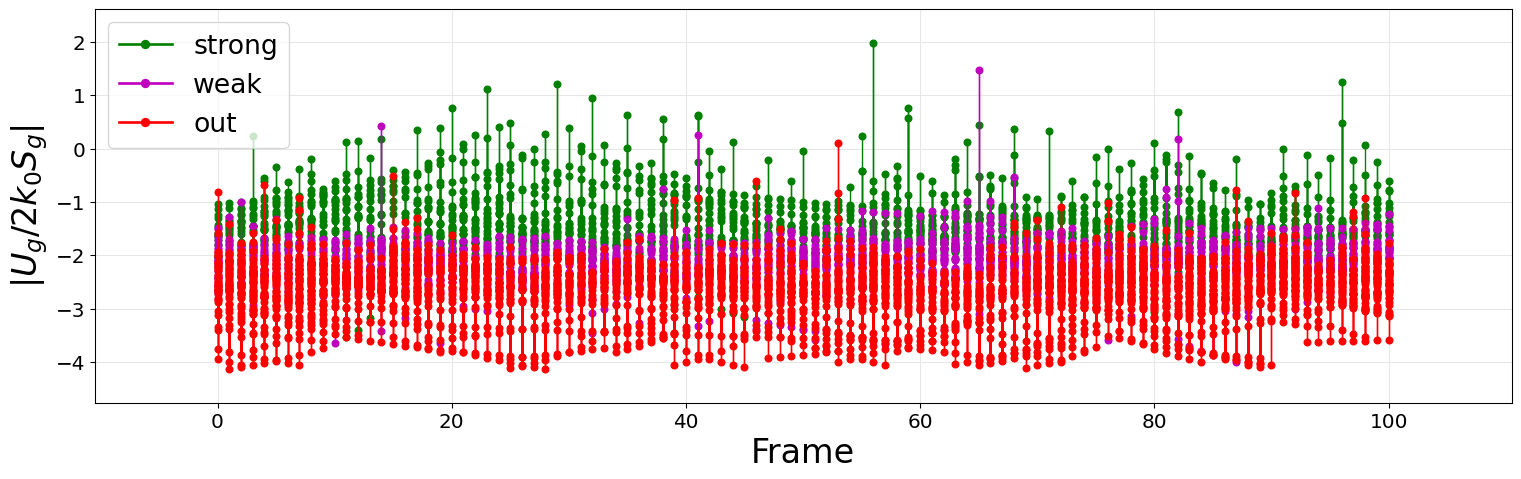

In [1231]:
# print(df_strong.sort_values('Imax',ascending=False))
rock = ut.load_pkl(rock_file('Nstrong_beam'))
# df_Fhkl = ut.load_pkl(rock(0).load(0).get_Fhkl_file())
plts=[]
legElt = {'strong':'g-o','weak':'m-o','out':'r-o'}
for i in range(rock.n_simus):
    b = rock.load(i)
    dfb=b.df_beams[['Ug/2KSg','tag']].drop(str((0,0,0)))
    for tag,cm in legElt.items():
        UgSw = dfb.loc[dfb.tag==tag,'Ug/2KSg'].values
        plts+= [[[i]*len(UgSw),np.log10(UgSw),cm,'']]
dsp.stddisp(plts,labs=['Frame','$|U_g/2k_0S_g|$'],legElt=legElt,figsize=figs);

## (-5,0,5) reflection 

Let's look at the rocking specifically around reflection $(-5,0,5)$.

In [184]:
h=str((-5,0,5))
df_Fhkl = pd.read_pickle(b.get_Fhkl_pkl())
df_Fhkl['Fga']  = np.real(np.abs(df_Fhkl.F))
df_Fhkl['Ug']   = np.real(np.abs(df_Fhkl.F*cst.meff(200)/(np.pi*b.crys.volume)))
df_Fhkl['xi_g'] = b.k0/df_Fhkl.Ug
df_Fhkl.loc[[h]]

name = '-5_0_5'

u=rock.df.u[rock.beams.loc[h].f_cen]
# b0=bloch.Bloch(path='dat/LTA',u=u,**Sargs)
# b0.show_df_G()
uvw__505=ut.get_uvw(u,osc=0.2,npts=101)

In [ ]:
Sargs.update(dict(Smax=0.01,opts='s0',solve=True))
rock__505 = bl.Bloch_cont(path=rock_path(name),uvw=uvw__505,tag='',Sargs=Sargs,
                     frames=np.arange(len(uvw)) )


Let's gather all the reflections in bragg condition at each point of the rocking curve.  

In [172]:
all_beams = [rock__505.load(i).df_G.sort_values('Swa')[['Sw','Uga','xi_g']] for i in range(rock__50_5.n_simus)]

### Rocking curve

5642.277553344294
total number of beams:1
gathering the intensities
gathering plots


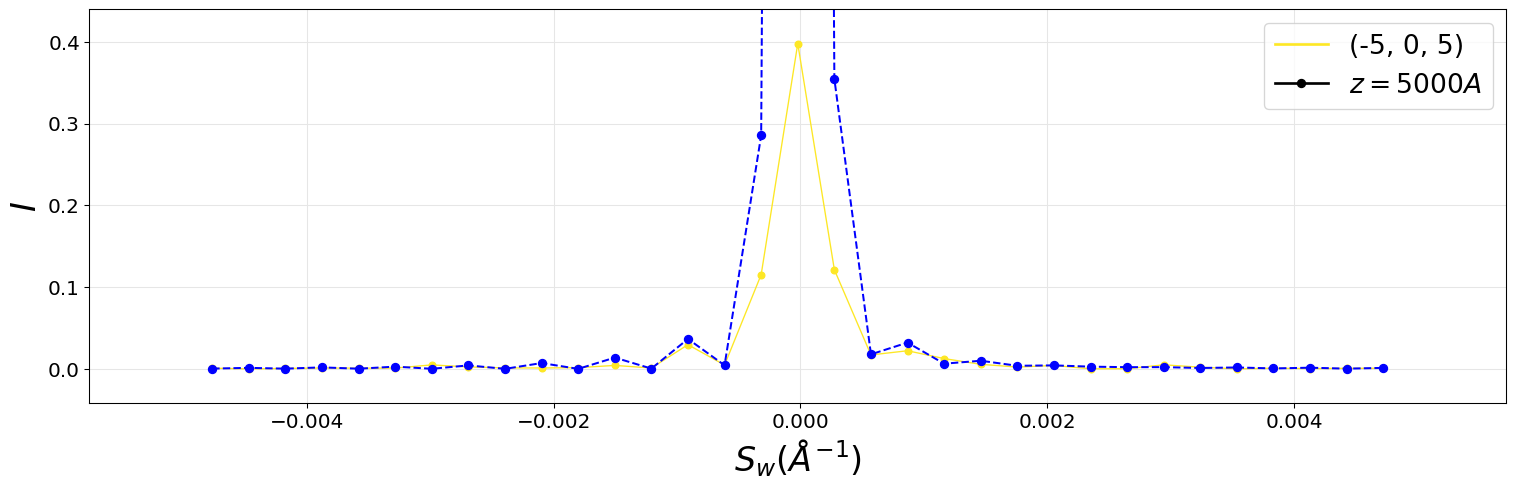

In [959]:
rock__505=ut.load_pkl(rock_file(name))
# rock__50_5.do('_set_beams_vs_thickness',verbose=False, thicks=np.arange(100,10001,100),v=False)
# print('plot')
h=str((-5,0,5))
zs = [5000]
t=zs[0]
sw=rock.beams.loc[h].Sw
xi_g=np.real(df_Fhkl.loc[h].xi_g);print(xi_g)
Ikin = ((np.pi*t/xi_g)*np.sinc(np.array(sw)*t))**2

fig,ax=rock__505.plot_rocking(refl=[h],zs=zs,figsize=figs)#,xylims=['y',0,1]);#,name='figs/rock_%s_%s.png' %(name,rep(h)),opt='sc')
ax.plot(sw,Ikin,'b--o',label='kin');



### 3 beam study 
In this study we will simulate rockings of some selected beams and only include the influence of the strongest neighbouring beam at each point of the rocking curve.


In [186]:
hkls = [hs.index[:3].values.tolist() for hs in all_beams]
_hkls=[]
for hs in hkls : 
    if h not in hs: hs[-1]=h
    _hkls.append(np.array([eval(h) for h in hs]))

name = '-5_0_5_3x3'

In [ ]:
Sargs.update(dict(Smax=0.01,opts='sv0',solve=True))
rock__505_3x3 = bl.Bloch_cont(path=rock_path(name),params=['hkl'],vals=[_hkls],uvw=uvw__505,tag='',Sargs=Sargs,
                     frames=np.arange(len(uvw__505)) )

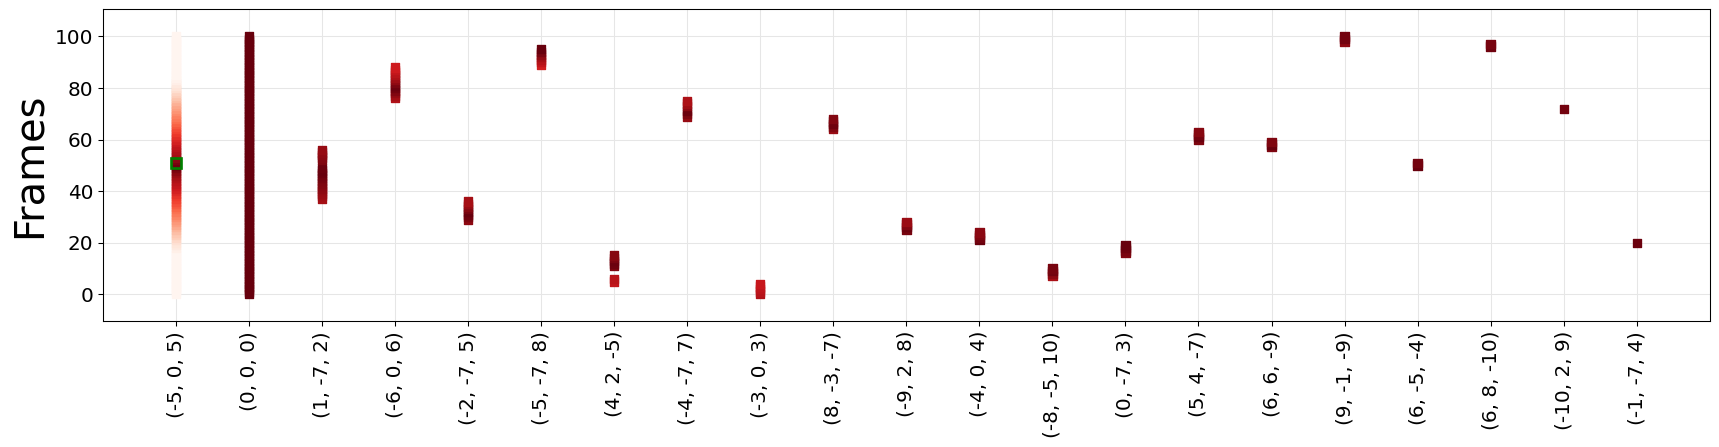

In [180]:
fig,ax=rock__505_3x3.show_excitation_map(vm=0.001,sw_min=5e-5,nb_max=50,figs=figs);

removing Friedel pairs
total number of beams:1
gathering the intensities
gathering plots


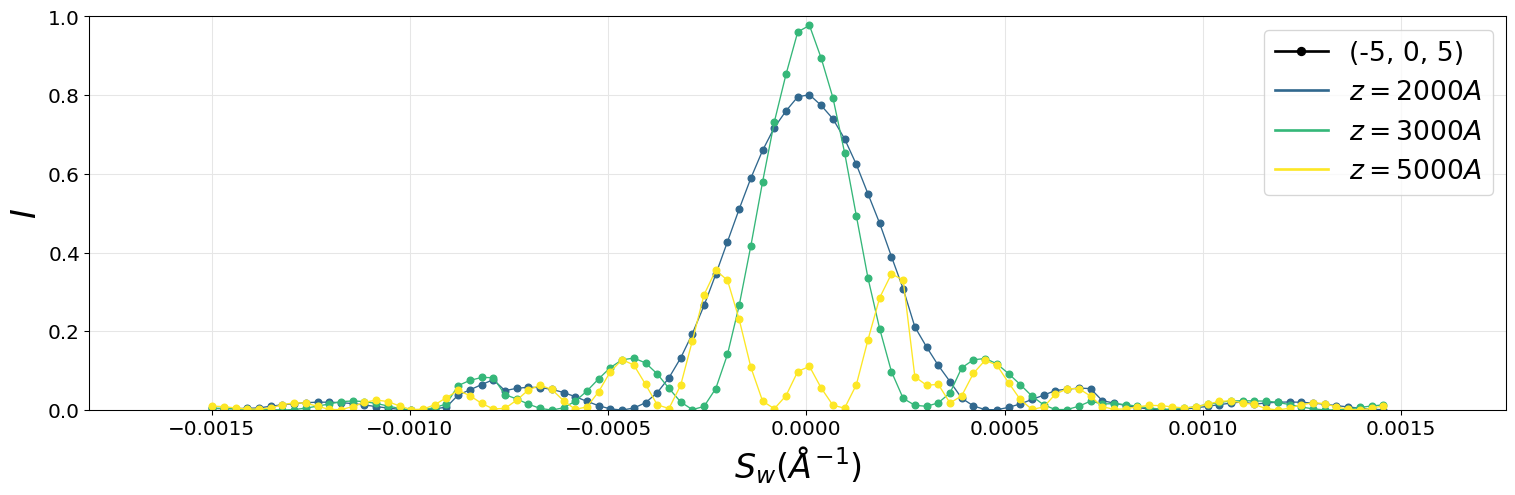

In [187]:
zs = [2000,3000,5000]
rock__505_3x3.do('_set_beams_vs_thickness',verbose=False, thicks=np.arange(100,10001,100),v=False)
rock__505_3x3.plot_rocking(refl=[h],zs=zs,figsize=figs,xylims=['y',0,1]);#,name='figs/rock_%s_%s.png' %(name,rep(h)),opt='sc')

### Increasing the number of beams 

In [224]:
Nbeams = np.arange(2,50).tolist()
Sargs.update(dict(Smax=0.01,opts='s0',solve=True))

for N in Nbeams : 
    hkls = [hs.index[:N].values.tolist() for hs in all_beams]
    _hkls=[]
    for hs in hkls : 
        if h not in hs: hs[-1]=h
        _hkls.append(np.array([eval(h) for h in hs]))
    
    name = '-5_0_5_%dx%d' %(N,N)
    r = bl.Bloch_cont(path=rock_path(name),params=['hkl'],vals=[_hkls],uvw=uvw__505,tag='',Sargs=Sargs,
                     frames=np.arange(len(uvw__505)) )
    r.do('_set_beams_vs_thickness',verbose=False, thicks=np.arange(100,10001,100),v=False)


imported file : resources/LTA.cif
object saved
dat/LTA/rocks/-5_0_5_2x2/hkl-u-frame__000.pkl
object saved
dat/LTA/rocks/-5_0_5_2x2/hkl-u-frame__000.pkl
imported file : resources/LTA.cif
object saved
dat/LTA/rocks/-5_0_5_2x2/hkl-u-frame__001.pkl
object saved
dat/LTA/rocks/-5_0_5_2x2/hkl-u-frame__001.pkl
imported file : resources/LTA.cif
object saved
dat/LTA/rocks/-5_0_5_2x2/hkl-u-frame__002.pkl
object saved
dat/LTA/rocks/-5_0_5_2x2/hkl-u-frame__002.pkl
imported file : resources/LTA.cif
object saved
dat/LTA/rocks/-5_0_5_2x2/hkl-u-frame__003.pkl
object saved
dat/LTA/rocks/-5_0_5_2x2/hkl-u-frame__003.pkl
imported file : resources/LTA.cif
object saved
dat/LTA/rocks/-5_0_5_2x2/hkl-u-frame__004.pkl
object saved
dat/LTA/rocks/-5_0_5_2x2/hkl-u-frame__004.pkl
imported file : resources/LTA.cif
object saved
dat/LTA/rocks/-5_0_5_2x2/hkl-u-frame__005.pkl
object saved
dat/LTA/rocks/-5_0_5_2x2/hkl-u-frame__005.pkl
imported file : resources/LTA.cif
object saved
dat/LTA/rocks/-5_0_5_2x2/hkl-u-frame__006

In [753]:
zs = [500]
h=str((-5,0,5))
Iz=[ut.load_pkl(rock_file('-5_0_5_%dx%d' %(N,N))).get_rocking(refl=[h],zs=zs)[1][h][:,0] for N in Nbeams]
#full dynamic 
Iend=rock__505.get_rocking(refl=[h],zs=zs)[1][h][:,0] 
Navg = rock__505.df.nbeams.mean()
sw = r.beams.loc[h].Sw
#kinematic
xi_g,t=np.real(df.loc[h].xi_g),zs[0]
Ikin = ((np.pi*t/xi_g)*np.sinc(np.array(sw)*t))**2

total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities


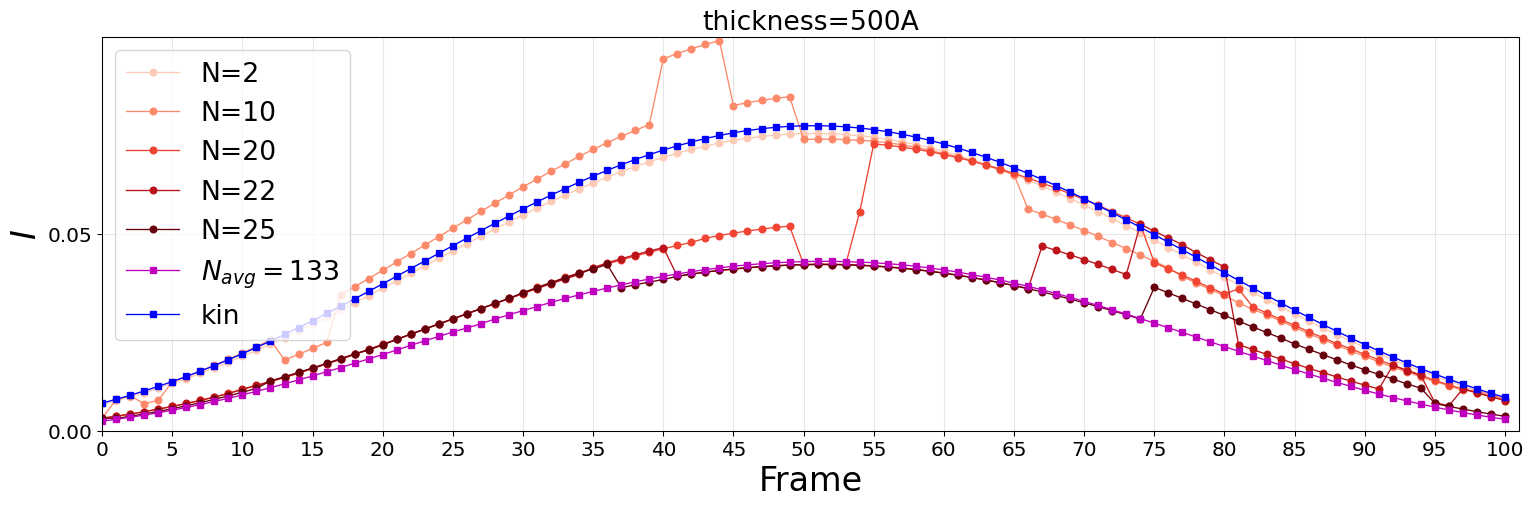

In [754]:
# fig,ax=dsp.create_fig(figsize=figs)
idx = [0,8,18,20,23]
x,xlab=sw,'$Sw(A^{-1})$'
x,xlab=np.arange(len(Iz[0])),'Frame'

cs = dsp.getCs('Reds',len(np.array(Nbeams)[idx]))
plts =[[x,Iz[i],[c,'-o'],'N=%d' %Nbeams[i]] for i,c in zip(idx,cs) ]
plts+=[[x,Iend,'m-s','$N_{avg}=%d$' %Navg]]
plts+=[[x,Ikin,'b-s','kin']]

dsp.stddisp(plts,labs=[xlab,'$I$'],xyTicks=[5,0.05],
            xylims=[0,101,0,0.1],title='thickness=%dA' %zs[0], 
            figsize=figs);

In [515]:
idx = 18
_hkls=np.array(mut.get_hkls(all_beams,idx+2,h=str((-5,0,5)),index=True))
# print(_hkls[49]);print(_hkls[50])

    
mut.get_beam_diff(_hkls,49);
mut.get_beam_diff(_hkls,53);
mut.get_beam_diff(_hkls,54);

(-9, 2, 8) -> (-6, 0, 6) 
(-3, 0, 3) -> (3, 2, -4) 
(-2, 0, 2) -> (8, -10, -4) 


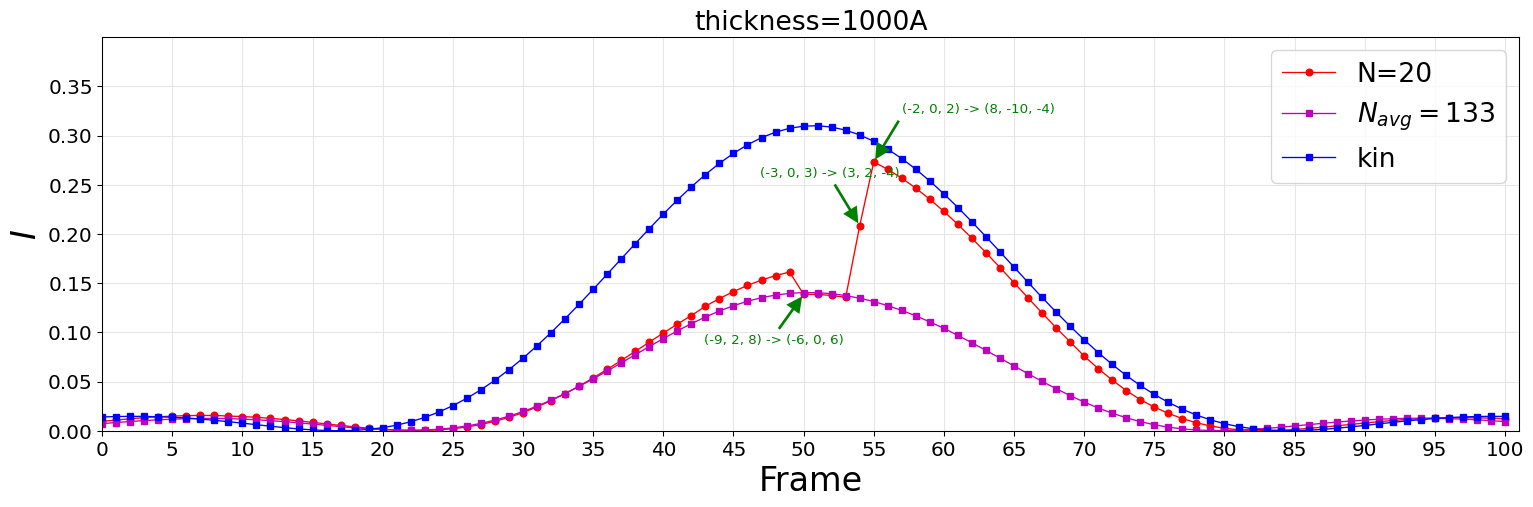

In [523]:
xi_g,t=np.real(df_Fhkl.loc[h].xi_g),zs[0]
Ikin = ((np.pi*t/xi_g)*np.sinc(np.array(sw)*t))**2

x=np.arange(len(Iz[0]))
plts =[[x,Iz[idx],'r-o','N=%d' %Nbeams[idx]] ]
plts+=[[x,Iend,'m-s','$N_{avg}=%d$' %Navg]]
plts+=[[x,Ikin,'b-s','kin']]

fig,ax=dsp.stddisp(plts,labs=['Frame','$I$'],xyTicks=[5,0.05],
            xylims=[0,101,0,0.4],title='thickness=%dA' %zs[0], 
            figsize=figs);
frames={49:(-1,-1,'center'),53:(-1,1,'center'),54:(1,1,'left')}
for f,(sx,sy,ha) in frames.items(): 
    txt = mut.get_beam_diff(_hkls,f,v=False);
    x,y=f+1, Iz[idx][f+1]
    ax.annotate('%s' %txt, xy=(x,y), color='g',xytext=(x+sx*2,y+sy*0.05),ha=ha,
                arrowprops=dict(facecolor='g',edgecolor='none', shrink=0.05,width=2),
                )
dsp.saveFig('paper_figs/%s')

### Running major beams 
In this simulations we will try to iteratively remove the beams that only affect the intensity of $h=(-5,0,5)$ at 500A by less that 5% . We will keep track of the contributions of each beam.

In [1044]:
#create a copy of the simulation to goof around
imp.reload(bloch)
rock=ut.load_pkl(rock_file('-5_0_5'))
b = copy.copy(rock.load(50))
b.set_name(name='-5_0_5',path=rpath+'/tests')
b.save()

using dpi=96
using screenszie=[20.0,11.25] inches
object saved
dat/LTA/rocks/tests/-5_0_5.pkl


In [1005]:
b = ut.load_pkl('dat/LTA/rocks/tests/-5_0_5.pkl')
h0 = [h,str((0,0,0))]
hkls = b.df_G.sort_values('Swa').index
df_hkl=dict()#np.zeros(len(hkls))#pd.DataFrame(columns=['dI'])
thick=500
h=str((-5,0,5))
b.solve(Nmax=10,opts='')
b.set_thickness(thick=thick,v=False)
I0 = b.df_G.loc[h,'I']
for hi in hkls.drop(h0):    
    #### run without beam hi
    _hkls = np.array([eval(s) for s in hkls.drop(hi)])
    b.solve(hkl=_hkls,opts='',Nmax=10,Smax=0)
    b.set_thickness(thick=thick,v=False)
    # print(hi,len(_hkls),b.df_G.loc[h,'I'],(b.df_G.loc[h,'I']-I0)/I0)
    v=(b.df_G.loc[h,'I']-I0)/I0
    df_hkl[hi]=v
    if abs(v)<0.02:        
        hkls=hkls.drop(hi)
        I0 = b.df_G.loc[h,'I']
df_hkl=pd.DataFrame.from_dict(df_hkl,orient='index',columns=['dI'])  
df_hkl['dIa'] = df_hkl.dI.abs() 

Let's look at the pertubation strength criteria from [Zuo1995](#zuo1995).

In [1104]:
# b.solve(Nmax=10,thick=thick,opts='vt',Smax=0.01)
df_hkl[['Swa','Uga']] = b.df_G.loc[df_hkl.index,['Swa','Uga']]
df_hkl['Ug/2KSw'] = df_hkl.Uga/(2*b.k0*df_hkl.Swa)
print(df_hkl.loc[df_hkl.dIa>0.001].sort_values('dIa',ascending=False).to_string())

                     dI       dIa       Swa       Uga   Ug/2KSw
(-3, 0, 3)     0.375393  0.375393  0.001050  0.006162  0.073608
(-2, 0, 2)     0.372727  0.372727  0.001054  0.009701  0.115415
(1, 0, -1)     0.229749  0.229749  0.001058  0.010118  0.119887
(-6, 0, 6)     0.219935  0.219935  0.001088  0.002210  0.025465
(-4, 0, 4)    -0.157167  0.157167  0.000691  0.005905  0.107124
(-1, 0, 1)    -0.156865  0.156865  0.000704  0.010118  0.180198
(5, 4, -7)     0.026627  0.026627  0.000461  0.003838  0.104346
(-2, -2, 3)   -0.016077  0.016077  0.006161  0.004040  0.008222
(-3, 2, 2)     0.014838  0.014838  0.007557  0.004040  0.006704
(-7, 0, 7)     0.009257  0.009257  0.002510  0.000875  0.004371
(2, 0, -2)     0.008593  0.008593  0.002471  0.009701  0.049233
(-5, 9, 1)    -0.007572  0.007572  0.004337  0.001966  0.005684
(-4, 9, 0)    -0.007375  0.007375  0.004332  0.004675  0.013532
(1, 2, -2)    -0.007149  0.007149  0.004740  0.005925  0.015675
(-7, 2, 6)    -0.006905  0.006905  0.004

In [1064]:
# compare intentisities with only strongest beams 
b.solve(Nmax=10,thick=thick,opts='vt',Smax=0.01)
I0 = b.df_G.loc[h,'I']
_hkls = np.array([eval(s) for s in df_hkl.loc[df_hkl.dIa>0.01].index.tolist()+h0 ])
b.solve(hkl=_hkls,Nmax=10,Smax=0,opts='vt',thick=thick)
I = b.df_G.loc[h,'I']
print('Iref = %.2e' %I0)
print('Ical = %.2e' %I )
print('Idif = %.2e' %(I0-i))
print('err  = %.1f %%' %(abs(I0-I)/I0*100))


 ...assembling 136x136 matrix (structure factor shape : (41, 41, 41)) ...             
...diagonalization...
updated intensities
 ...assembling 11x11 matrix (structure factor shape : (41, 41, 41)) ...             
...diagonalization...
updated intensities
Iref = 4.30e-02
Ical = 4.11e-02
Idif = -2.60e+01
err  = 4.3 %


### Integration

In [449]:
for N in Nbeams : 
    r=ut.load_pkl(rock_file('-5_0_5_%dx%d' %(N,N)))
    r._integrate_rocking(refl=[h])

object saved
dat/LTA/rocks/-5_0_5_2x2/rock_.pkl
rock.Iz updated
object saved
dat/LTA/rocks/-5_0_5_3x3/rock_.pkl
rock.Iz updated
object saved
dat/LTA/rocks/-5_0_5_4x4/rock_.pkl
rock.Iz updated
object saved
dat/LTA/rocks/-5_0_5_5x5/rock_.pkl
rock.Iz updated
object saved
dat/LTA/rocks/-5_0_5_6x6/rock_.pkl
rock.Iz updated
object saved
dat/LTA/rocks/-5_0_5_7x7/rock_.pkl
rock.Iz updated
object saved
dat/LTA/rocks/-5_0_5_8x8/rock_.pkl
rock.Iz updated
object saved
dat/LTA/rocks/-5_0_5_9x9/rock_.pkl
rock.Iz updated
object saved
dat/LTA/rocks/-5_0_5_10x10/rock_.pkl
rock.Iz updated
object saved
dat/LTA/rocks/-5_0_5_11x11/rock_.pkl
rock.Iz updated
object saved
dat/LTA/rocks/-5_0_5_12x12/rock_.pkl
rock.Iz updated
object saved
dat/LTA/rocks/-5_0_5_13x13/rock_.pkl
rock.Iz updated
object saved
dat/LTA/rocks/-5_0_5_14x14/rock_.pkl
rock.Iz updated
object saved
dat/LTA/rocks/-5_0_5_15x15/rock_.pkl
rock.Iz updated
object saved
dat/LTA/rocks/-5_0_5_16x16/rock_.pkl
rock.Iz updated
object saved
dat/LTA/rocks

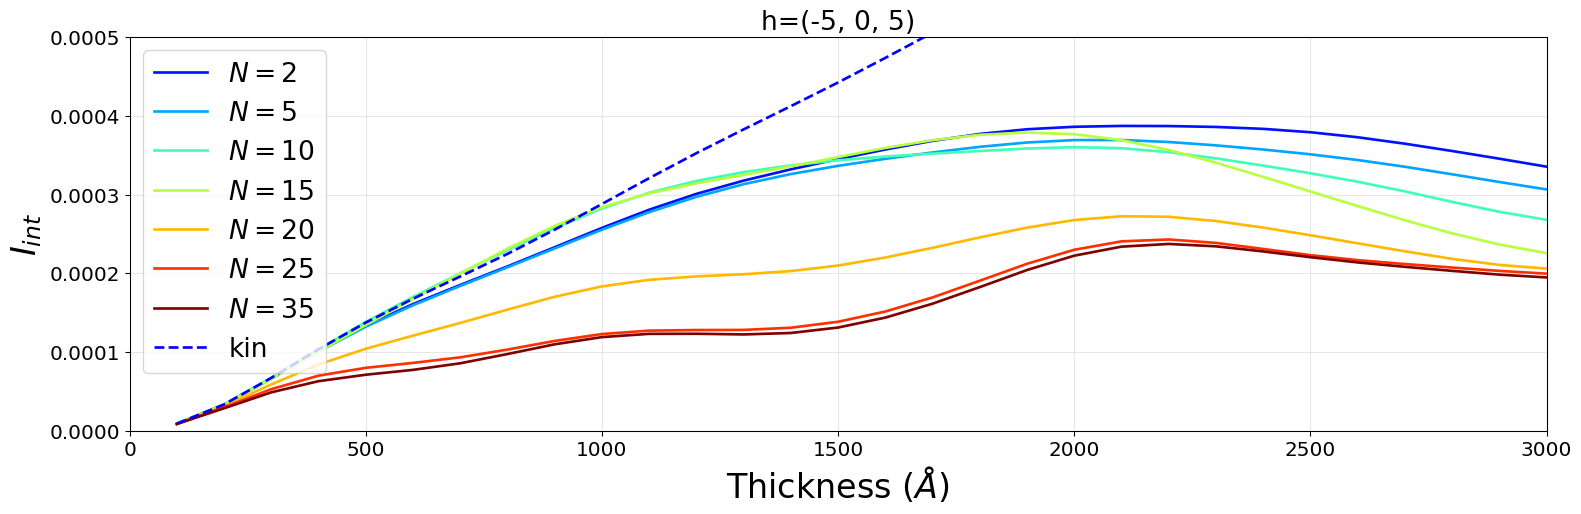

In [1069]:
## kinematic integration
h=str((-5,0,5))
xi_g=np.real(df_Fhkl.loc[h].xi_g)
r=ut.load_pkl(rock_file('-5_0_5_%dx%d' %(2,2)))
sw,z=np.array(r.beams.loc[h].Sw),r.load(0).z
# print(len(sw),z.shape)
Ikin = lambda sg,t,xi_g : ((np.pi*t/xi_g)*np.sinc(sg*t))**2
Ikins = np.array([integrate.trapz(Ikin(sw,t,xi_g),sw) for t in z])

h=str((-5,0,5))
idx = [0,3,8,13,18,23,33]
cs = dsp.getCs('jet',len(np.array(Nbeams)[idx]))

plts=[[z,ut.load_pkl(rock_file('-5_0_5_%dx%d' %(N,N))).Iz_dyn[h],c,'$N=%d$' %N] for N,c in zip(np.array(Nbeams)[idx],cs)]
plts+=[[z,Ikins,'b--','kin']]
dsp.stddisp(plts,labs=['Thickness ($\AA$)','$I_{int}$'],#xyTicks=[5,0.05],
            xylims=[0,3000,0,0.0005],#,0,0.4],
            title='h=%s' %h, figsize=figs,lw=2);

## (-3,0,3) reflection 
### Run rocking curve

In [855]:
h=str(tuple([-3,0,3]))
rock=ut.load_pkl(rock_file('Nbeam'))
# print(rock.beams.loc[h])
u=rock.df.u[rock.beams.loc[h].f_cen]
# print(rock.beams.loc[h].f_cen,u)
Sargs=dict(cif_file=cif_file,Smax=0.01,keV=200,Nmax=10,solve=True,opts='s0',v=False)
Nbeams=np.arange(2,50,1).tolist()

# import misc_utils as mut;imp.reload(mut)
h_name=mut.refl_rocking_curve(h,u,osc=1,npts=101,Nbeams=Nbeams,Sargs=Sargs,path='dat/LTA/rocks/',full=True)

run full rocking curve
creating directory: dat/LTA/rocks//-3_0_3

...Structure factors...
structure factors updated.
rocking N=2x2
creating directory: dat/LTA/rocks//-3_0_3_2x2

...Structure factors...
structure factors updated.
rocking N=3x3
creating directory: dat/LTA/rocks//-3_0_3_3x3

...Structure factors...
structure factors updated.
rocking N=4x4
creating directory: dat/LTA/rocks//-3_0_3_4x4

...Structure factors...
structure factors updated.
rocking N=5x5
creating directory: dat/LTA/rocks//-3_0_3_5x5

...Structure factors...
structure factors updated.
rocking N=6x6
creating directory: dat/LTA/rocks//-3_0_3_6x6

...Structure factors...
structure factors updated.
rocking N=7x7
creating directory: dat/LTA/rocks//-3_0_3_7x7

...Structure factors...
structure factors updated.
rocking N=8x8
creating directory: dat/LTA/rocks//-3_0_3_8x8

...Structure factors...
structure factors updated.
rocking N=9x9
creating directory: dat/LTA/rocks//-3_0_3_9x9

...Structure factors...
structure fact

### Display rocking curves

In [856]:
zs = [500]
h=str(tuple([-3,0,3]))
h_name = h[1:-1].replace(', ','_')
Iz=[ut.load_pkl(rock_file('%s_%dx%d' %(h_name,N,N))).get_rocking(refl=[h],zs=zs)[1][h][:,0] for N in Nbeams]

#full dynamic 
rock_full = ut.load_pkl(rock_file(h_name))
rock_full._get_iZs(iZs=None,zs=zs)
Iend = rock_full.get_rocking(refl=[h],zs=zs)[1][h][:,0] 
Navg = rock_full.df.nbeams.mean()



total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities


using dpi=96
using screenszie=[20.0,11.25] inches
using dpi=96
using screenszie=[20.0,11.25] inches
xi_g((-3, 0, 3)) = 6471.3A


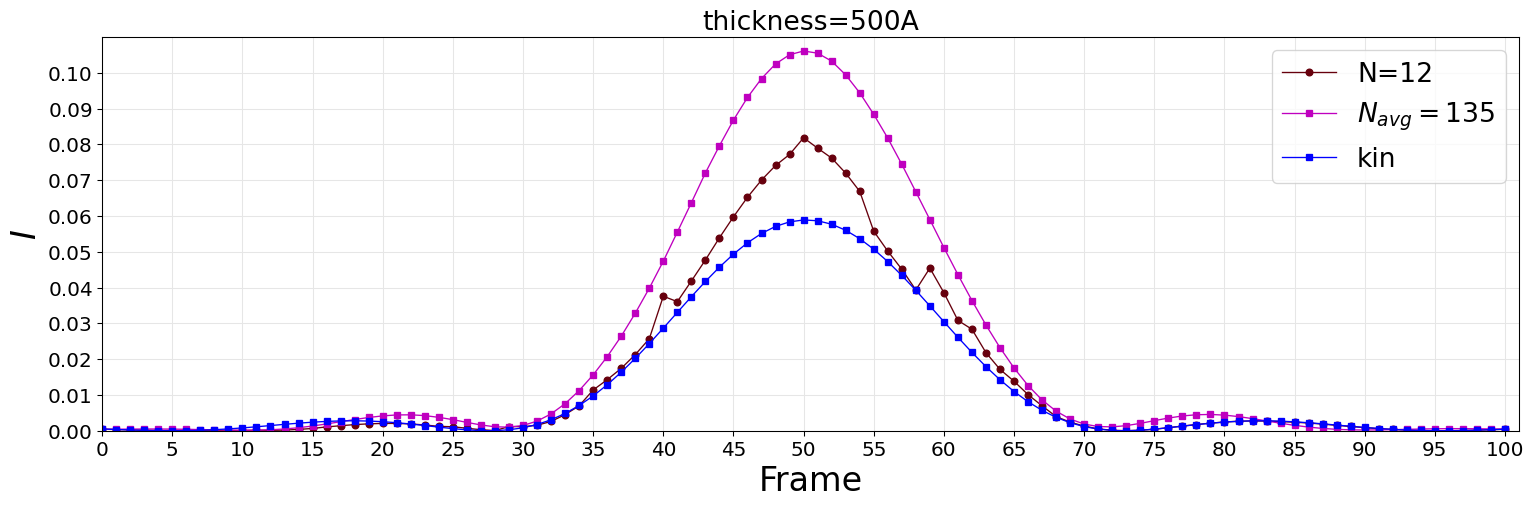

In [915]:
import misc_utils as mut;imp.reload(mut)
idx = [10]#(np.arange(20,30,2)-2).tolist() 
sw = rock_full.beams.loc[h].Sw
x,xlab=sw,'$Sw(A^{-1})$'
x,xlab=np.arange(len(Iz[0])),'Frame'

#kinematic
print('xi_g(%s) = %.1fA' %(h,xi_g))
xi_g,t=np.real(rock_full.load(0).df_G.loc[h].xi_g),zs[0]
Ikin = ((np.pi*t/xi_g)*np.sinc(np.array(sw)*t))**2


cs = dsp.getCs('Reds',len(np.array(Nbeams)[idx]))
plts =[[x,Iz[i],[c,'-o'],'N=%d' %Nbeams[i]] for i,c in zip(idx,cs) ]
plts+=[[x,Iend,'m-s','$N_{avg}=%d$' %Navg]]
plts+=[[x,Ikin,'b-s','kin']]

fig,ax=dsp.stddisp(plts,labs=[xlab,'$I$'],
            xyTicks=[5,0.01],xylims=[0,101,0,0.11],
            title='thickness=%dA' %zs[0], 
            figsize=figs);

_hkls = mut.get_hkls(h,rpath,idx[0]+2,index=True)
# mut.annotate_beams(ax,_hkls,frames={44:(-1,0,'right'),49:(-1,-1,'center'),50:(1,-1,'center')},I=Iz[5])
# mut.annotate_beams(ax,_hkls,frames={48:(-1,0,'right'),52:(1,0,'left')},I=Iz[20])
# dsp.saveFig('paper_figs/%s')

## (-1,-7,4) reflection 
### Run rocking curves 

In [610]:
h=str(tuple([-1,-7,4]))
rock=ut.load_pkl(rock_file('Nbeam'))
u=rock.df.u[rock.beams.loc[h].f_cen]
# print(rock.beams.loc[h].f_cen,u)
Sargs=dict(cif_file=cif_file,Smax=0.01,keV=200,Nmax=10,solve=True,opts='s0',v=False)
Nbeams=np.arange(2,50,1).tolist()

# import misc_utils as mut;imp.reload(mut)
# h_name=mut.refl_rocking_curve(h,u,osc=0.6,npts=101,Nbeams=Nbeams,Sargs=Sargs,path='dat/LTA/rocks/',full=True)

using dpi=96
using screenszie=[20.0,11.25] inches
using dpi=96
using screenszie=[20.0,11.25] inches
run full rocking curve
rocking N=2x2
rocking N=3x3
rocking N=4x4
rocking N=5x5
rocking N=6x6
rocking N=7x7
rocking N=8x8
rocking N=9x9
rocking N=10x10
rocking N=11x11
rocking N=12x12
rocking N=13x13
rocking N=14x14
rocking N=15x15
rocking N=16x16
rocking N=17x17
rocking N=18x18
rocking N=19x19
rocking N=20x20
rocking N=21x21
rocking N=22x22
rocking N=23x23
rocking N=24x24
rocking N=25x25
rocking N=26x26
rocking N=27x27
rocking N=28x28
rocking N=29x29
rocking N=30x30
rocking N=31x31
rocking N=32x32
rocking N=33x33
rocking N=34x34
rocking N=35x35
rocking N=36x36
rocking N=37x37
rocking N=38x38
rocking N=39x39
rocking N=40x40
rocking N=41x41
rocking N=42x42
rocking N=43x43
rocking N=44x44
rocking N=45x45
rocking N=46x46
rocking N=47x47
rocking N=48x48
rocking N=49x49


### Display rocking curves 

In [818]:
zs = [500]
h=str(tuple([-1,-7,4]))
h_name = h[1:-1].replace(', ','_')
Iz=[ut.load_pkl(rock_file('%s_%dx%d' %(h_name,N,N))).get_rocking(refl=[h],zs=zs)[1][h][:,0] for N in Nbeams]

#full dynamic 
rock_full = ut.load_pkl(rock_file(h_name))
rock_full._get_iZs(iZs=None,zs=zs)
Iend = rock_full.get_rocking(refl=[h],zs=zs)[1][h][:,0] 
Navg = rock_full.df.nbeams.mean()
#kinematic
xi_g,t=np.real(rock_full.load(0).df_G.loc[h].xi_g),zs[0];print(xi_g)
Ikin = ((np.pi*t/xi_g)*np.sinc(np.array(sw)*t))**2


total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities
total number of beams:1
gathering the intensities


420978.78046858264


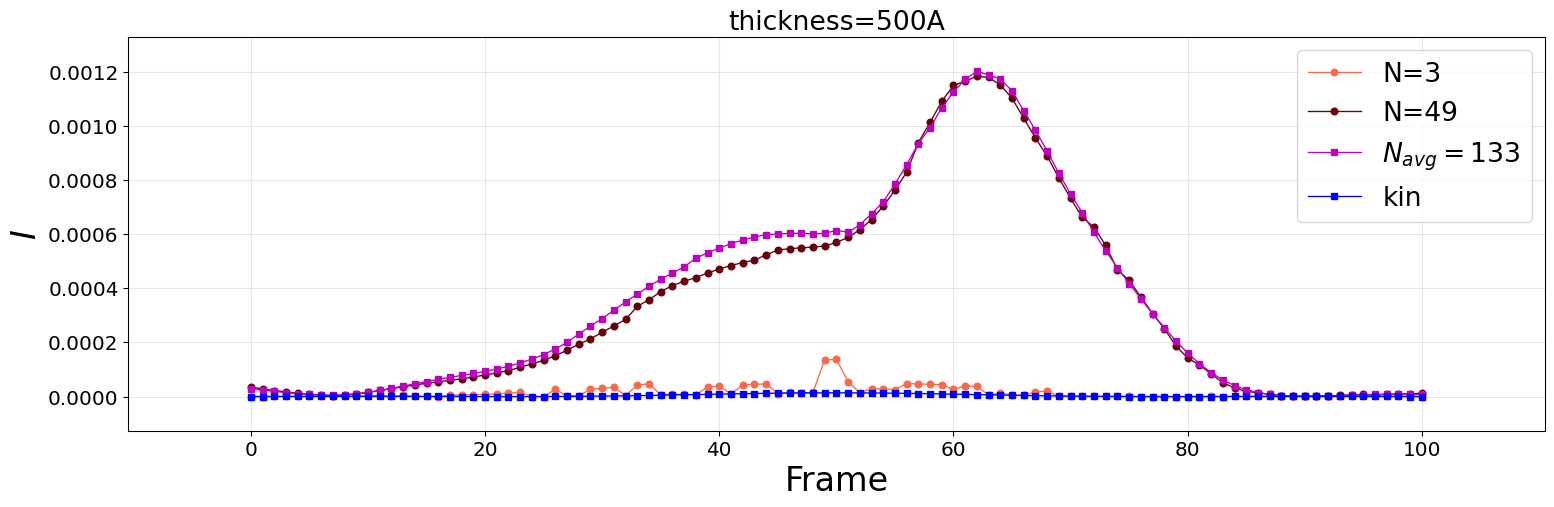

In [822]:
idx = [1,-1]#(np.arange(20,30,2)-2).tolist() 
sw = rock_full.beams.loc[h].Sw
x,xlab=sw,'$Sw(A^{-1})$'
x,xlab=np.arange(len(Iz[0])),'Frame'
print(xi_g)
cs = dsp.getCs('Reds',len(np.array(Nbeams)[idx]))
plts =[[x,Iz[i],[c,'-o'],'N=%d' %Nbeams[i]] for i,c in zip(idx,cs) ]
plts+=[[x,Iend,'m-s','$N_{avg}=%d$' %Navg]]
plts+=[[x,Ikin,'b-s','kin']]

dsp.stddisp(plts,labs=[xlab,'$I$'],
            # xyTicks=[5,0.0005],xylims=[0,101,0,0.0015],
            title='thickness=%dA' %zs[0], 
            figsize=figs);

## References
- <a id="zuo1995"></a> Zuo, J., & Weickenmeier, A. L. (1995). On the beam selection and convergence in the Bloch-wave method. Ultramicroscopy, 57(4), 375–383. https://doi.org/10.1016/0304-3991(94)00190-X